In [3]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    widths = []
    heights = []
    
    # 遍历文件夹中的所有文件
    print(len(os.listdir(folder_path)))
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(folder_path, filename)
            
            # 打开图片文件
            with Image.open(file_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
    print(len(widths))
    return widths, heights

def calculate_statistics(sizes):
    if not sizes:
        return None, None, None
    
    avg_size = sum(sizes) / len(sizes)
    max_size = max(sizes)
    min_size = min(sizes)
    
    return avg_size, max_size, min_size

folder_path = '/mnt/data1/workspace/wmq/YOLO-World/data/coco/val2017'

# 获取所有图片的宽度和高度
widths, heights = get_image_sizes(folder_path)

# 计算宽度的平均值、最大值和最小值
avg_width, max_width, min_width = calculate_statistics(widths)
# 计算高度的平均值、最大值和最小值
avg_height, max_height, min_height = calculate_statistics(heights)

# 输出结果
print(f"图片宽度的平均值: {avg_width} 像素")
print(f"图片宽度的最大值: {max_width} 像素")
print(f"图片宽度的最小值: {min_width} 像素")

print(f"图片高度的平均值: {avg_height} 像素")
print(f"图片高度的最大值: {max_height} 像素")
print(f"图片高度的最小值: {min_height} 像素")


5000
5000
图片宽度的平均值: 573.7548 像素
图片宽度的最大值: 640 像素
图片宽度的最小值: 200 像素
图片高度的平均值: 483.543 像素
图片高度的最大值: 640 像素
图片高度的最小值: 145 像素


In [1]:
import torch
cp = torch.load("/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_v2_s_vlpan_bn_2e-4_80e_8gpus_mask-refine_finetune_dota_train_val_rep/best_dota_mAP_epoch_51_rep_conv.pth")

In [3]:
cp['state_dict'].keys()

dict_keys(['backbone.image_model.stem.conv.weight', 'backbone.image_model.stem.bn.weight', 'backbone.image_model.stem.bn.bias', 'backbone.image_model.stem.bn.running_mean', 'backbone.image_model.stem.bn.running_var', 'backbone.image_model.stem.bn.num_batches_tracked', 'backbone.image_model.stage1.0.conv.weight', 'backbone.image_model.stage1.0.bn.weight', 'backbone.image_model.stage1.0.bn.bias', 'backbone.image_model.stage1.0.bn.running_mean', 'backbone.image_model.stage1.0.bn.running_var', 'backbone.image_model.stage1.0.bn.num_batches_tracked', 'backbone.image_model.stage1.1.main_conv.conv.weight', 'backbone.image_model.stage1.1.main_conv.bn.weight', 'backbone.image_model.stage1.1.main_conv.bn.bias', 'backbone.image_model.stage1.1.main_conv.bn.running_mean', 'backbone.image_model.stage1.1.main_conv.bn.running_var', 'backbone.image_model.stage1.1.main_conv.bn.num_batches_tracked', 'backbone.image_model.stage1.1.final_conv.conv.weight', 'backbone.image_model.stage1.1.final_conv.bn.weight

In [11]:
cp['state_dict']['neck.top_down_layers.0.attn_block.guide_convs.3.weight'].shape

torch.Size([15, 32, 1, 1])

In [3]:
max(widths)

2048

In [2]:
widths

[2691,
 420,
 881,
 7906,
 1474,
 1346,
 6181,
 1444,
 606,
 4000,
 4294,
 1609,
 3311,
 1317,
 920,
 1097,
 3590,
 432,
 698,
 1791,
 594,
 636,
 1139,
 1309,
 2098,
 949,
 907,
 4000,
 5879,
 2911,
 4228,
 1216,
 2719,
 1224,
 2334,
 3907,
 695,
 1889,
 1169,
 1804,
 6627,
 2782,
 3944,
 1792,
 912,
 1319,
 1698,
 2015,
 1135,
 3302,
 2749,
 632,
 713,
 1391,
 5200,
 2051,
 691,
 733,
 1658,
 1850,
 5200,
 2349,
 668,
 1691,
 1407,
 9089,
 4000,
 719,
 2344,
 1846,
 4000,
 1659,
 1922,
 1367,
 743,
 3018,
 5200,
 2577,
 2904,
 596,
 4000,
 851,
 886,
 1991,
 1131,
 5982,
 3564,
 1197,
 2404,
 1519,
 4000,
 4293,
 2540,
 1441,
 2986,
 2588,
 731,
 1403,
 10478,
 2564,
 7253,
 691,
 1900,
 881,
 3255,
 2686,
 1487,
 603,
 1113,
 1573,
 980,
 1105,
 6513,
 2974,
 4000,
 816,
 737,
 2466,
 4000,
 4601,
 4000,
 1143,
 4000,
 2388,
 4216,
 6327,
 1703,
 682,
 1568,
 2085,
 3014,
 2940,
 3373,
 2318,
 1779,
 2449,
 1349,
 717,
 2086,
 779,
 938,
 5200,
 1169,
 4000,
 1983,
 7905,
 2138,
 44

In [1]:
import numpy as np
embedding = np.load("/mnt/data1/workspace/wmq/YOLO-World/tools/embeddings/dota_v1_class_texts_helicopter_embedding.npy")

In [2]:
embedding.shape

(1, 512)

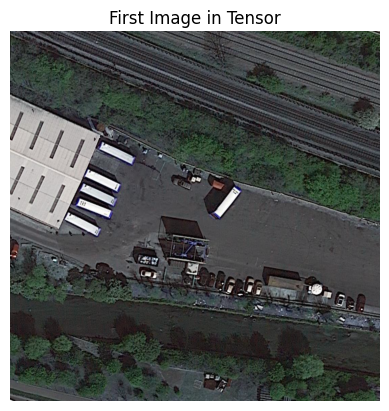

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

img_data = torch.load("/mnt/data1/workspace/wmq/inputs.pth")[1]
if img_data.ndim == 3:
    img_data = img_data.permute(1, 2, 0)

# 将 PyTorch 张量转换为 NumPy 数组
img_data = img_data.numpy()

# 绘制图像
plt.imshow(img_data)
plt.axis('off')  # 隐藏坐标轴
plt.title('First Image in Tensor')
plt.show()

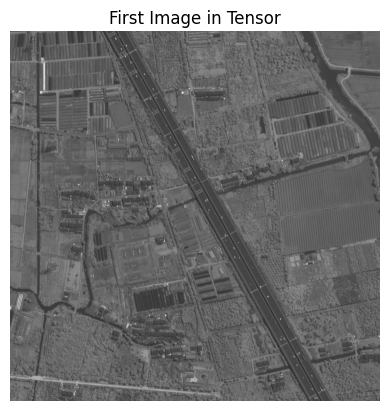

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

img_data = torch.load("/mnt/data1/workspace/wmq/inputs.pth")[0]
if img_data.ndim == 3:
    img_data = img_data.permute(1, 2, 0)

# 将 PyTorch 张量转换为 NumPy 数组
img_data = img_data.numpy()

# 绘制图像
plt.imshow(img_data)
plt.axis('off')  # 隐藏坐标轴
plt.title('First Image in Tensor')
plt.show()

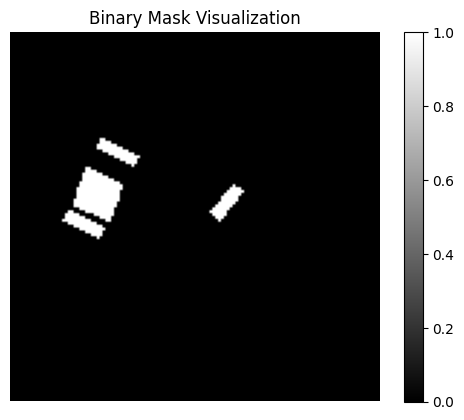

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

# Load the mask data from the file
mask_data = torch.load("/mnt/data1/workspace/wmq/mask_gt_128.pth")[1][12].cpu()

# Convert the tensor to a NumPy array
mask_np = mask_data.numpy()

# Use Matplotlib to display the mask
plt.imshow(mask_np, cmap='gray')  # Use a grayscale color map
plt.colorbar()  # Optional: adds a color bar to the side
plt.title("Binary Mask Visualization")
plt.axis('off')  # Optional: removes the axis for cleaner visualization
plt.show()

In [9]:
mask_data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [24]:
mask_data = torch.load("/mnt/data1/workspace/wmq/masks.pth")[0]

In [13]:
mask_data.shape

torch.Size([15, 128, 128])

In [25]:
torch.where(mask_data[3]==1)

(tensor([], device='cuda:0', dtype=torch.int64),
 tensor([], device='cuda:0', dtype=torch.int64))

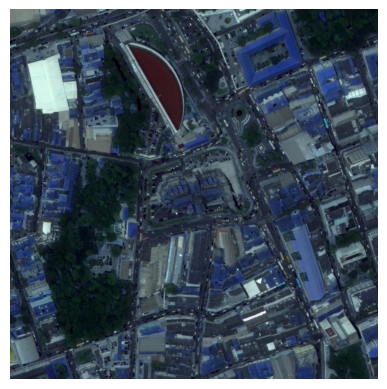

In [1]:
import torch
import matplotlib.pyplot as plt

# 加载保存的 .pth 文件
img_tensor = torch.load('/mnt/data1/workspace/wmq/fmow_tunnel_opening_448_8_rgb_img_flip.pth')

plt.imshow(img_tensor)
plt.axis('off')  # 不显示坐标轴
plt.show()


In [5]:
import torch

In [8]:
cp1 = torch.load("/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_v2_l_vlpan_bn_2e-3_80e_8gpus_mask-refine_frozen_fmow_cloudcov/best_fmow_loss_epoch_6.pth")
cp2 = torch.load("/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_v2_l_vlpan_bn_2e-4_80e_8gpus_mask-refine_finetune_dota_train_val/best_dota_mAP_epoch_67.pth")

In [14]:
cp1['state_dict'].keys()

odict_keys(['backbone.image_model.stem.conv.weight', 'backbone.image_model.stem.bn.weight', 'backbone.image_model.stem.bn.bias', 'backbone.image_model.stem.bn.running_mean', 'backbone.image_model.stem.bn.running_var', 'backbone.image_model.stem.bn.num_batches_tracked', 'backbone.image_model.stage1.0.conv.weight', 'backbone.image_model.stage1.0.bn.weight', 'backbone.image_model.stage1.0.bn.bias', 'backbone.image_model.stage1.0.bn.running_mean', 'backbone.image_model.stage1.0.bn.running_var', 'backbone.image_model.stage1.0.bn.num_batches_tracked', 'backbone.image_model.stage1.1.main_conv.conv.weight', 'backbone.image_model.stage1.1.main_conv.bn.weight', 'backbone.image_model.stage1.1.main_conv.bn.bias', 'backbone.image_model.stage1.1.main_conv.bn.running_mean', 'backbone.image_model.stage1.1.main_conv.bn.running_var', 'backbone.image_model.stage1.1.main_conv.bn.num_batches_tracked', 'backbone.image_model.stage1.1.final_conv.conv.weight', 'backbone.image_model.stage1.1.final_conv.bn.weigh

In [23]:
key = 'neck.top_down_layers.1.main_conv.bn.running_mean'
torch.sum(cp1['state_dict'][key] == cp2['state_dict'][key]) == cp2['state_dict'][key].shape.numel()

tensor(True, device='cuda:0')

In [24]:
cp1['state_dict'][key]

tensor([ 6.5960e-01,  2.3845e-01,  2.6172e-01,  1.1183e+00,  2.2879e-01,
         4.8706e-01,  6.7143e-01,  1.0428e+00,  4.5635e-01,  5.8983e-01,
         8.6075e-01,  4.4568e-01,  4.0333e-01,  2.3784e-01,  4.5659e-01,
         1.1249e+00,  2.7280e-01,  9.7574e-01, -1.8209e-01,  6.8042e-01,
         7.8083e-01,  4.0612e-01,  5.8393e-01,  8.9794e-01,  7.5133e-01,
         5.3545e-01,  5.6187e-01,  6.5195e-01,  8.2673e-01, -8.5502e-02,
         7.6434e-03,  3.0025e-01,  6.3909e-01,  6.5338e-01,  5.6131e-01,
        -4.3237e-01,  1.0493e+00,  6.3396e-01,  7.0736e-01,  6.1820e-01,
        -1.0304e-02,  1.1787e+00,  3.5876e-01, -2.9919e-01,  2.8929e-01,
         1.7300e-01,  8.7915e-01,  9.2415e-01,  3.9735e-01,  3.1173e-01,
         5.8116e-01, -2.5639e-01,  4.0704e-01,  5.9910e-01,  4.6836e-01,
         8.2970e-01, -9.5116e-03, -3.9338e-04,  1.8171e-02,  9.8929e-01,
         3.9958e-01,  6.5449e-01,  5.7119e-01,  5.2440e-01,  1.7434e-01,
         7.3983e-01,  1.3167e+00,  4.4622e-01,  1.1

In [25]:
cp2['state_dict'][key]

tensor([ 6.5960e-01,  2.3845e-01,  2.6172e-01,  1.1183e+00,  2.2879e-01,
         4.8706e-01,  6.7143e-01,  1.0428e+00,  4.5635e-01,  5.8983e-01,
         8.6075e-01,  4.4568e-01,  4.0333e-01,  2.3784e-01,  4.5659e-01,
         1.1249e+00,  2.7280e-01,  9.7574e-01, -1.8209e-01,  6.8042e-01,
         7.8083e-01,  4.0612e-01,  5.8393e-01,  8.9794e-01,  7.5133e-01,
         5.3545e-01,  5.6187e-01,  6.5195e-01,  8.2673e-01, -8.5502e-02,
         7.6434e-03,  3.0025e-01,  6.3909e-01,  6.5338e-01,  5.6131e-01,
        -4.3237e-01,  1.0493e+00,  6.3396e-01,  7.0736e-01,  6.1820e-01,
        -1.0304e-02,  1.1787e+00,  3.5876e-01, -2.9919e-01,  2.8929e-01,
         1.7300e-01,  8.7915e-01,  9.2415e-01,  3.9735e-01,  3.1173e-01,
         5.8116e-01, -2.5639e-01,  4.0704e-01,  5.9910e-01,  4.6836e-01,
         8.2970e-01, -9.5116e-03, -3.9338e-04,  1.8171e-02,  9.8929e-01,
         3.9958e-01,  6.5449e-01,  5.7119e-01,  5.2440e-01,  1.7434e-01,
         7.3983e-01,  1.3167e+00,  4.4622e-01,  1.1

In [2]:
import numpy as np
a = np.load("/mnt/data1/workspace/wmq/YOLO-World/tools/embeddings/dota_v1_class_texts_remoteclip_helicopter_embedding.npy")

In [3]:
a.shape

(1, 512)